# EDA

##### 20_명세서일반내역 데이터셋 탐색적분석 결과
##### 성별과 진료과목코드 별 진료횟수 분석 필요성 발생
##### x= 진료횟수, y= 진료과목 으로 설정
##### x <- 진료횟수를 성별로 구분하여 컬럼생성
##### y <- 진료과목을 정제 

# 데이터 정제

### 데이터 불러오기

In [1]:
import pandas as pd

In [5]:
path = './files_new2/df_kor_20table_명세서일반내역.xlsx'
df_20 = pd.read_excel(path)

### 데이터 필요컬럼 추출하기

In [6]:
df_20_1 = df_20[['진료과목코드','성별구분코드','요양개시일자']]
df_20_1

,진료과목코드,성별구분코드,요양개시일자
0,1,1,20130108
1,0,2,20130212
2,3,1,20130222
3,54,1,20130608
4,1,1,20131128
...,...,...,...
5626,56,2,20131001
5627,1,1,20130423
5628,11,1,20130112
5629,5,2,20130401


In [7]:
df_20_1['요양개시일자'] = df_20_1['요양개시일자'].astype(str)
df_20_1['요양개시월'] = df_20_1['요양개시일자'].str[4:6]
df_20_1

C:\Users\admin\AppData\Local\Temp\ipykernel_10108\3920369764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20_1['요양개시일자'] = df_20_1['요양개시일자'].astype(str)
C:\Users\admin\AppData\Local\Temp\ipykernel_10108\3920369764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20_1['요양개시월'] = df_20_1['요양개시일자'].str[4:6]


,진료과목코드,성별구분코드,요양개시일자,요양개시월
0,1,1,20130108,01
1,0,2,20130212,02
2,3,1,20130222,02
3,54,1,20130608,06
4,1,1,20131128,11
...,...,...,...,...
5626,56,2,20131001,10
5627,1,1,20130423,04
5628,11,1,20130112,01
5629,5,2,20130401,04


### X : 진료과목코드 추출 및 삽입

In [8]:
df_20_1['진료과목코드'].value_counts().head(10)

1     1808
5      755
11     468
13     358
14     269
12     268
23     241
55     213
4      183
9      154
Name: 진료과목코드, dtype: int64

In [9]:
df_20_1_1 = df_20_1[df_20_1['진료과목코드']==1]
df_20_1_2 = df_20_1[df_20_1['진료과목코드']==5]
df_20_1_3 = df_20_1[df_20_1['진료과목코드']==11]
df_20_1_4 = df_20_1[df_20_1['진료과목코드']==13]
df_20_1_5 = df_20_1[df_20_1['진료과목코드']==14]
df_20_1_6 = df_20_1[df_20_1['진료과목코드']==12]
df_20_1_7 = df_20_1[df_20_1['진료과목코드']==23]
df_20_1_8 = df_20_1[df_20_1['진료과목코드']==55]
df_20_1_9 = df_20_1[df_20_1['진료과목코드']==4]
df_20_1_10 = df_20_1[df_20_1['진료과목코드']==9]
df_20_1_5

,진료과목코드,성별구분코드,요양개시일자,요양개시월
5,14,2,20130204,02
7,14,2,20130107,01
12,14,1,20131123,11
24,14,2,20130629,06
65,14,1,20130426,04
...,...,...,...,...
5575,14,2,20130824,08
5590,14,2,20130329,03
5591,14,2,20131226,12
5600,14,1,20130913,09


In [10]:
df_20_total = pd.concat([df_20_1_1,df_20_1_2,df_20_1_3,df_20_1_4,df_20_1_5,df_20_1_6,df_20_1_7,df_20_1_8,df_20_1_9,df_20_1_10], axis=0, sort=True)
df_20_total

,성별구분코드,요양개시월,요양개시일자,진료과목코드
0,1,01,20130108,1
4,1,11,20131128,1
11,1,01,20130129,1
14,2,09,20130930,1
17,1,01,20130125,1
...,...,...,...,...
5380,2,03,20130319,9
5465,2,07,20130712,9
5492,2,05,20130531,9
5558,2,06,20130612,9


### Y : 성별별 진료횟수 분류

In [11]:
df_20_total_p = df_20_total.pivot_table(values='요양개시월',
                            index='진료과목코드',
                            columns='성별구분코드',
                            aggfunc='count')
df_20_total_p

성별구분코드,1,2
진료과목코드,,
1,986,822
4,120,63
5,301,454
9,18,136
11,235,233
12,151,117
13,179,179
14,117,152
23,121,120


In [12]:
df_20_total_p = df_20_total_p.reset_index()
df_20_total_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   진료과목코드  10 non-null     int64
 1   1       10 non-null     int64
 2   2       10 non-null     int64
dtypes: int64(3)
memory usage: 368.0 bytes


In [13]:
df_20_total_p = pd.DataFrame(df_20_total_p)
df_20_total_p

성별구분코드,진료과목코드,1,2
0,1,986,822
1,4,120,63
2,5,301,454
3,9,18,136
4,11,235,233
5,12,151,117
6,13,179,179
7,14,117,152
8,23,121,120
9,55,130,83


In [14]:
df_20_total_p = df_20_total_p.drop('진료과목코드', axis=1)
df_20_total_p.rese

AttributeError: 'DataFrame' object has no attribute 'rese'

In [15]:
df_20_total_p.columns = ['남자','여자']
df_20_total_p

,남자,여자
0,986,822
1,120,63
2,301,454
3,18,136
4,235,233
5,151,117
6,179,179
7,117,152
8,121,120
9,130,83


# 시각화

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

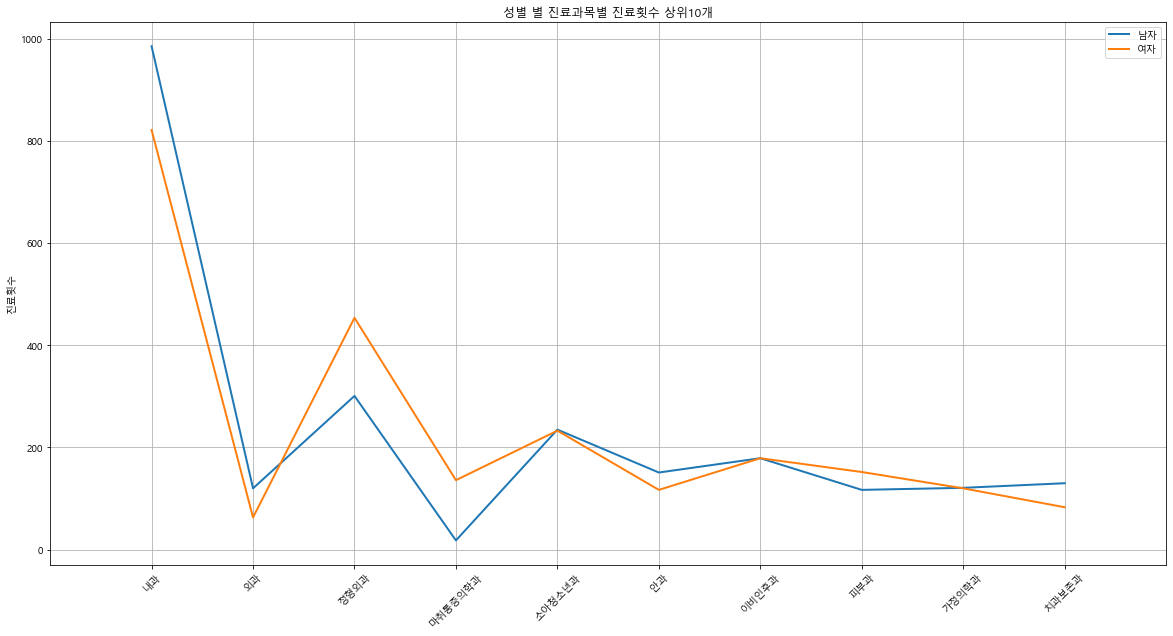

In [17]:
# 그래프 크기 지정하기 = 너비, 높이
plt.rcParams['figure.figsize'] = (20, 10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트지정
plt.rc("font", family = "Malgun Gothic", size=10)

# 데이터 넣기
df_20_total_p.plot()

plt.title("성별 별 진료과목별 진료횟수 상위10개")
plt.ylabel("진료횟수")

plt.xticks([i for i in range(0,10,1)],['내과'
,'외과'
,'정형외과'
,'마취통증의학과'
,'소아청소년과'
,'안과'
,'이비인후과'
,'피부과'
,'가정의학과'
,'치과보존과'],rotation=45)

plt.xlim(-1,10)
# 범례 위치 변경하기
plt.legend(loc="upper right")
# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()

'''
남녀모두 내과-정형외과-소아청소년과-이비인후과 순으로 진료횟수가 많다
내과의 진료횟수는 남자의 정형외과 진료횟수보다 4배 정도이며, 여자의 정형외과 진료횟수보다 2배 정도이다
남자는 마취통증의학과의 진료횟수가 가장 낮았고, 여자는 외과의 진료횟수가 가장 낮았다
월별 진료과목의 진료횟수를 탐색한다면 추세를 알 수 있어 좋을 듯 하다
남자의 진료횟수가 더 많은 진료과목은 3개이며 여자의 진료횟수가 더 많은 진료과목은 3개이고 같은것은 2개이다
'''

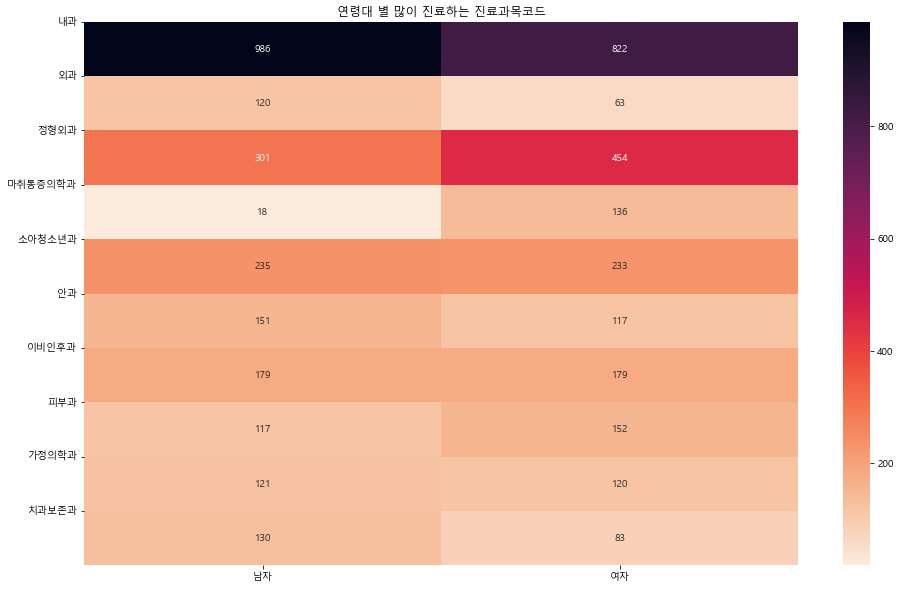

In [19]:
plt.figure(figsize=(16,10))
sns.heatmap(df_20_total_p, annot=True, fmt='.0f', cmap='rocket_r')
plt.title("연령대 별 많이 진료하는 진료과목코드")
plt.yticks([i for i in range(0,10,1)],['내과'
,'외과'
,'정형외과'
,'마취통증의학과'
,'소아청소년과'
,'안과'
,'이비인후과'
,'피부과'
,'가정의학과'
,'치과보존과'],rotation=0)
plt.show()

# 결론

'''
1. 남녀모두 내과-정형외과-소아청소년과-이비인후과 순으로 진료횟수가 많다
2. 내과의 진료횟수는 남자의 정형외과 진료횟수보다 4배 정도이며, 여자의 정형외과 진료횟수보다 2배 정도이다
3. 남자는 마취통증의학과의 진료횟수가 가장 낮았고, 여자는 외과의 진료횟수가 가장 낮았다
4. 월별 진료과목의 진료횟수를 탐색한다면 추세를 알 수 있어 좋을 듯 하다
5. 남자의 진료횟수가 더 많은 진료과목은 3개이며 여자의 진료횟수가 더 많은 진료과목은 3개이고 같은것은 2개이다
'''